<a href="https://colab.research.google.com/github/EdRey05/Resources_for_Mulligan_Lab/blob/main/Tools%20for%20students/Eduardo%20Reyes/Design01_PLA_results_PPTX_generator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Notebook for automated generation of results summary presentations of Proximity Ligation Assays**

**Notebook made by:** *Eduardo Reyes Alvarez (Ph.D.)*

**Affiliation:** *Dr. Lois Mulligan's lab, Queen's University.*

**Contact:** *eduardo_reyes09@hotmail.com*

**Latest modification:** V01 - September 03, 2022.


## ***Information about this notebook***

This section explains what the notebook does, its requirements, how the design of the slides was done and the outputs of the notebook (no code to run here). To see all the info click below this text on **"cells hidden"** and to collapse/hide again click on the triangle on the left of the title.

**Function of the notebook**

This notebook takes any number of Proximity Ligation Assay (PLA) images that were cropped and quantified, and prepares a summary Power Point presentation with the results of the experiment. In the presentation we will find:


1.   Slides for each experimental condition / group (separated), and also separated based on the original image they were croped from (if big images were taken with multiple cells, the same condition will have multiple cells/ROIs originated from the same original image).

2.   Each slide shows pairs of fluorescence images of the cells selected with their ROI name and next to it there is the corresponding image of the quantification of puncta for that ROI and the label corresponds to the number of puncta given by the method used (Find Maxima or Threshold).

3.   The key is that we can quickly preview in one single file all the cell morphologies we picked to analyze, and verify the numbers match what we would expect just looking at the puncta in the cell by eye. If the cells look too bad in the fluorescence images, we can fin the number that corresponds to that cell in the results file and discard it. Also, we can evaluate the work of the quantification methods since all the black noise in those quantification images correspond to ignored pixels (didn't meet the criteria) and only the coloured ones were quantified. Controls should have barely any black or coloured particles in the images (and thus low number P=), but the other conditions were we look for interactions may have or not more black noise, coloured puncta, and numbers that match with what our eyes can see.



**Requirements of the notebook**

Since this notebook was created specifically to generate a results report for experiments of the author's PLA experiments, the requirements are just to upload a new pptx file with a blank slide (just empty), making sure to click in Power Point: Design-> Slide Size -> Widescreen (16:9), and the compressed zip file called "Data", which should contain all the following:

1.   A folder called "Data" (1st level).

2.   Any number of subfolders (2nd level) corresponding to each experimental condition that you want to include in the same summary presentation.

3.   Each 2nd level subfolder can have a unique name, but their content should have the same structure: 2 folders (3rd level), one called "Cropped cells", and the other "Quantification". Both of these were produced from the processed images by the author's script V03: https://github.com/EdRey05/Resources_for_Mulligan_Lab/blob/b80eaf75d35665aeb4b7e60ed85685f342d9f125/Tools%20for%20PLA%20quantification/PLA_quantification.py

4.   The Cropped cells folder contains 3 folders (4th level) called "Fluorescence", "FM_Particles", and "T_Particles". They all have subfolders with the names Row_01_05... to Row_45_51 on the 5th level. The Fluorescence folder has ROIs (6th level) of cells in the form of "Number_2.jpg" and the other 2 folders "Number_1.jpg", which refer to the same cell (one ROI used to make the presentation, other to quantify).

5.   The Quantification folder (4th level) has only one csv file with the results of the quantification.



**Parameters defined to insert the images on the slides**

The specific coordinates of all the elements desired in the slides were previously tested on a pptx by manually arranging the images with the intended number of rows, columns, images per slide, labels, text boxes and a size adequate to gain enough insight of the results while keeping the number of slides as low as possible. Once all the intended content for a single slide was set into approximate position, all the sizes were calculated and set to precise numbers in order to make it reproducible and iterable. 

**Goal:**
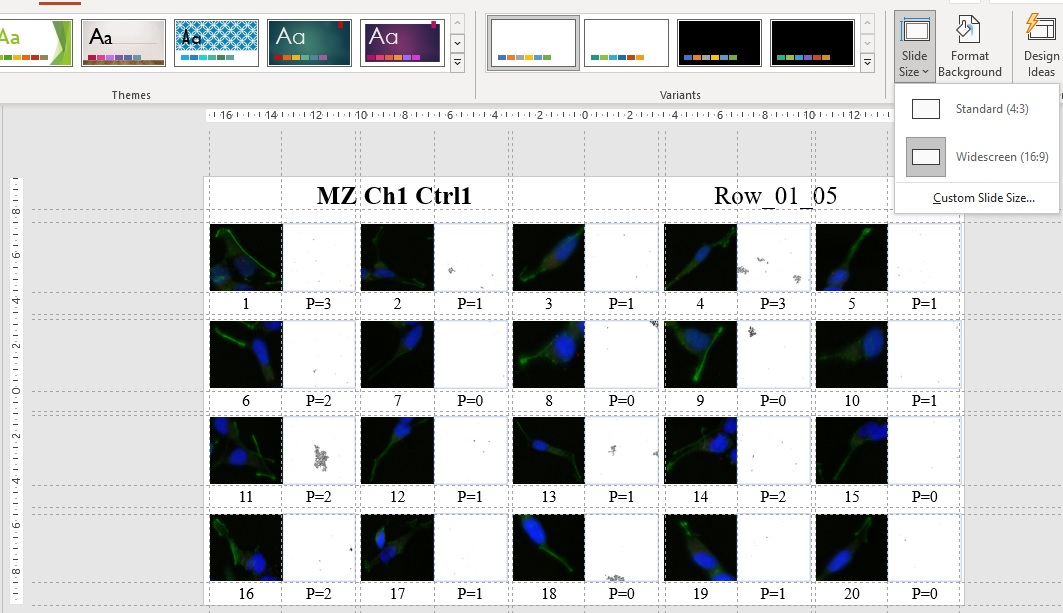

Making this setup of automated generation of Power Point presentations is possible using the ***python-pptx*** library, for which parameters need to be defined, coordinates to place our objects of interest and their sizes need to be calculated. For more information on this library, see:  https://pypi.org/project/python-pptx/

All the parameters considered are the following:

1.   Slides of 16:9 ratio (34cm width, 19cm height, all measurement units set to cm).

2.   Two titles at the very top, their text boxes of 17cm width and 1.5cm height each, side by side with no separation from the top corners. Title bold font, subtitle normal font, and both Times New Roman size 32 points).

3.   Below the title+subtitle, there is a 0.6cm space to the first row of images, so the first row starts at X, 2.1cm (X = distance from the left edge).

4.   Each image will be resized to 3.25cm width by 3cm height. The pairs consist of a fluorescence image on the left side and a particle analysis on the right side, with no space separating them.

5.   There are 0.25cm separating each pair (5 pairs per row, 4 pairs per column, total 20 pairs/cells = 40 images per slide), and also 0.25cm separating the first and last pair of a row from the edges of the slide.

6.   There is a text box right under each image (the borders touch). For the fluorescence image the text refers to the name of the ROI analyzed, whereas the particle image shows the count of particles for that particular cell so we can quickly inspect whether all the coloured particles coincide with the actual puncta we see in the fluorescence image and the final count (or if there was an error due to the quantification process). This text boxes are 3.25cm width by 1cm height, contain Times New Roman text size 20 points.

7.   The second row is separated 0.3cm from the bottom edge of the labels mentioned in 6. Same for the third and fourth row (which almost ends at the very edge of the slide).

**Coordinates of each object based on the goal:**
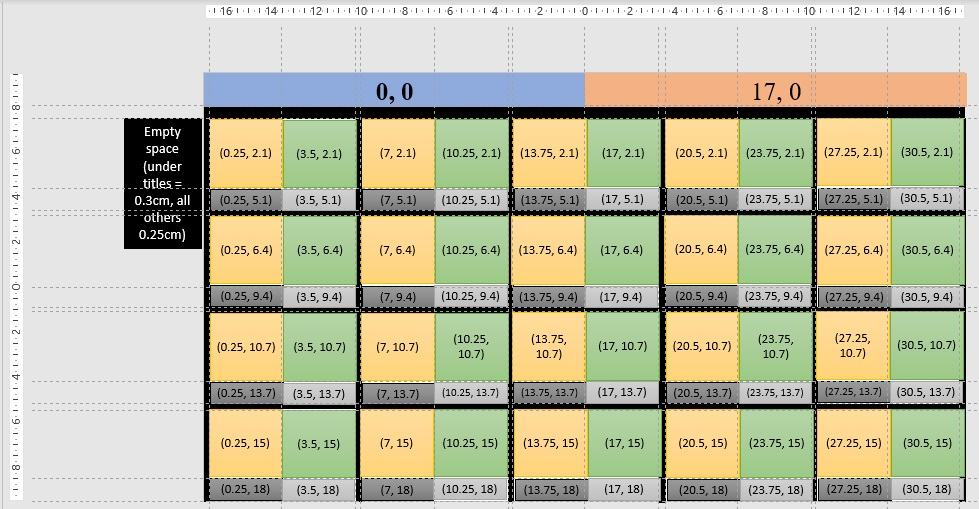

**Outputs of the script**

The current version of this notebook produces 2 pptx files, one using the fluorescence images + the find maxima images, and the second one using the same fluorescence images but with the thresholded images. Ideally, we would want to examine both to check which works better, since under ideal conditions both give very similar results, but raw image quality and processing can create some differences within a condition or experiment so using the same threshold method will cause a lot of artifacts in some images (find maxima uses a different principle, more insensitive to these variability).


-

***Once you have finished reading this information section, collapse it by clicking in the triangle on the left side of the section title***

## ***Starting the notebook***

This section does the following steps:

1.   Installs the required packages not included in the default settings of Google Colab.

2.   Imports all the packages needed (default + recently intalled) to this notebook.

3.   Declares the main function which creates slides and inserts images, with all its pre-defined parameters. [See this section if you are interested in implementation of python-pptx]

**To begin, press the play button that appears when you hover over the text below "6 cells hidden"  and wait a few seconds.**

In [104]:
#Before we begin, import this to remove unwanted/very long outputs
from google.colab import output

In [105]:
#Install additional libraries
!pip install python-pptx

output.clear()

In [106]:
#Import the neccesary packages from the python-pptx library

#To make the presentation
from pptx import Presentation

#To specify sizes of images and text (Other options like inches are available)
from pptx.util import Cm, Pt            

#To specify text alignment (the method is used on the text frame, not on the box or the actual text)
from pptx.enum.text import PP_ALIGN     

#To work with line and fill colours
from pptx.enum.dml import MSO_THEME_COLOR

In [107]:
#Import other general packages 

#To work and iterate through folders/paths
import os
import glob

#To upload files to Colab
from google.colab import files

#To extract all the input images and folders in Colab 
from zipfile import ZipFile

#To load and work with the results files (csv's)
import pandas as pd
import natsort as ns

#To make placeholders or timers
import time

Here we make a function to create a new slide and insert the images of interest. We will use the specific sizes and coordinates set below but they need to be adjusted for any other layout (see info section). 


---


**Note:** The image and label coordinates are declared in a list of tuples (coordinates can't change for this notebook), so we can iterate through the images grouped per slide (1-20) and only use the required coordinates (we don't need to iterate 20 times all the time if the slides only have few images, it is better to iterate per image in the slide and use the index to find its corresponding coordinates). The filling order will be left to right, top-down. Since the fluorescence and particle images both come from the same cell, their names will be "1_2.jpg" and "1_1.jpg", respectively, so the tuple of coordinates consists of 4 elements: the first is the distance from the left edge of the slide for the fluorescence image, the second is the distance from the top edge of the slide for the fluorescence image, the third is the distance from the left edge of the slide for the particle image, and the fourth is the distance from the top edge of the slide for the particle image. This way, we can use the same ROI name to get both images by replacing part of the directory and the "_2.jpg" for "_1.jpg", however, the index in the for loop will be the same, since we have the coordinates of both images in the same element of the list (tuple of 4 coordinates).

In [108]:
#Main function, it adds slides and inserts images+text only. It should be called in between openning a pptx and saving the pptx
#See section "Generate the presentations" for reference of how to open an existing pptx, call this function, feed it and save the results

def slide_maker(current_slide_title, current_slide_subtitle, image_count_for_slide, F_images_for_slide, P_images_for_slide, F_images_labels, P_images_labels):

    #NOTE: All coordinates are stated allways in the same order: From left first, from top second.

    #Title text box dimensions and coordinates (centimeters) 
    title_width = 17
    title_height = 1.5
    title_left_coordinate = 0
    title_top_coordinate = 0
    
    #Subtitle text box dimensions and coordinates (centimeters)
    subtitle_width = 17
    subtitle_height = 1.5
    subtitle_left_coordinate = 17
    subtitle_top_coordinate = 0
    
    #Size and coordinates for the 20 pairs of images (centimeters)
    image_width = 3.25
    image_height = 3
    image_coordinates = [
    (0.25, 2.1, 3.5, 2.1),   (7, 2.1, 10.25, 2.1),   (13.75 , 2.1, 17, 2.1),  (20.5, 2.1, 23.75, 2.1),    (27.25, 2.1, 30.5, 2.1),
    (0.25, 6.4, 3.5, 6.4),   (7, 6.4, 10.25, 6.4),   (13.75, 6.4, 17, 6.4),   (20.5, 6.4, 23.75, 6.4),    (27.25, 6.4, 30.5, 6.4),
    (0.25, 10.7, 3.5, 10.7), (7, 10.7, 10.25, 10.7), (13.75, 10.7, 17, 10.7), (20.5, 10.7, 23.75, 10.7),  (27.25, 10.7, 30.5, 10.7),
    (0.25, 15, 3.5, 15),     (7, 15, 10.25, 15),     (13.75, 15, 17, 15),     (20.5, 15, 23.75, 15),      (27.25, 15, 30.5, 15)
    ]
    
    #Size and coordinates for the 20 pairs of text labels (centimeters) (+3cm top coordinate of images)
    image_labels_width = 3.25
    image_labels_height = 1
    image_labels_coordinates = [
    (0.25, 5.1, 3.5, 5.1),   (7, 5.1, 10.25, 5.1),   (13.75 , 5.1, 17, 5.1),  (20.5, 5.1, 23.75, 5.1),    (27.25, 5.1, 30.5, 5.1),
    (0.25, 9.4, 3.5, 9.4),   (7, 9.4, 10.25, 9.4),   (13.75, 9.4, 17, 9.4),   (20.5, 9.4, 23.75, 9.4),    (27.25, 9.4, 30.5, 9.4),
    (0.25, 13.7, 3.5, 13.7), (7, 13.7, 10.25, 13.7), (13.75, 13.7, 17, 13.7), (20.5, 13.7, 23.75, 13.7),  (27.25, 13.7, 30.5, 13.7),
    (0.25, 18, 3.5, 18),     (7, 18, 10.25, 18),     (13.75, 18, 17, 18),     (20.5, 18, 23.75, 18),      (27.25, 18, 30.5, 18)
    ]
    
    #Create a new slide (layout Blank)
    blank_slide_layout = presentation_output.slide_layouts[6]
    slide = presentation_output.slides.add_slide(blank_slide_layout)
    
    #Make the title for this experimental condition
    left = Cm(title_left_coordinate)
    top = Cm(title_top_coordinate)
    width = Cm(title_width)
    height = Cm(title_height)
    title_textbox = slide.shapes.add_textbox(left, top, width, height)
    title_frame = title_textbox.text_frame
    title_text = title_frame.paragraphs[0]
    title_frame.paragraphs[0].alignment = PP_ALIGN.CENTER
    title_text.text = current_slide_title
    title_text.font.bold = True
    title_text.font.size = Pt(32)
    title_text.font.name = "Times New Roman"
    
    #Make the subtitle for the image where the ROI was cropped from
    left = Cm(subtitle_left_coordinate)
    top = Cm(subtitle_top_coordinate)
    width = Cm(subtitle_width)
    height = Cm(subtitle_height)
    subtitle_textbox = slide.shapes.add_textbox(left, top, width, height)
    subtitle_frame = subtitle_textbox.text_frame
    subtitle_text = subtitle_frame.paragraphs[0]
    subtitle_frame.paragraphs[0].alignment = PP_ALIGN.CENTER
    subtitle_text.text = current_slide_subtitle
    subtitle_text.font.size = Pt(32)
    subtitle_text.font.name = "Times New Roman"
    
    #Based on the number of images for the current slide, retrieve the neccesary images and coordinates
    for i in range(image_count_for_slide):
        
        #Find the images to insert
        fluorescence_image = F_images_for_slide[i]
        particle_image = P_images_for_slide[i]
        
        #Insert the cropped cell from the Fluorescence folder first
        left = Cm(image_coordinates[i][0])
        top = Cm(image_coordinates[i][1])
        width = Cm(image_width)
        height = Cm(image_height)
        inserting_image = slide.shapes.add_picture(fluorescence_image, left, top, width, height)
        
        #Insert the text label corresponding to the image just inserted above
        left = Cm(image_labels_coordinates[i][0])
        top = Cm(image_labels_coordinates[i][1])
        width = Cm(image_labels_width)
        height = Cm(image_labels_height)
        inserting_image_textbox = slide.shapes.add_textbox(left, top, width, height)
        inserting_image_frame = inserting_image_textbox.text_frame
        inserting_image_text = inserting_image_frame.paragraphs[0]
        inserting_image_frame.paragraphs[0].alignment = PP_ALIGN.CENTER
        inserting_image_text.text = F_images_labels[i]
        inserting_image_text.font.size = Pt(20)
        inserting_image_text.font.name = "Times New Roman"
        
        #Insert the cropped cell from the Particles folder second (FM or T particles)
        left = Cm(image_coordinates[i][2])
        top = Cm(image_coordinates[i][3])
        width = Cm(image_width)
        height = Cm(image_height)
        inserting_image2 = slide.shapes.add_picture(particle_image, left, top, width, height)
        inserting_image2.line.fill.solid()
        inserting_image2.line.width = Pt(0.5)
        inserting_image2.line.fill.fore_color.theme_color = MSO_THEME_COLOR.ACCENT_1
    
        #Insert the text label corresponding to the particle counts just inserted above
        left = Cm(image_labels_coordinates[i][2])
        top = Cm(image_labels_coordinates[i][3])
        width = Cm(image_labels_width)
        height = Cm(image_labels_height)
        inserting_image2_textbox = slide.shapes.add_textbox(left, top, width, height)
        inserting_image2_frame = inserting_image2_textbox.text_frame
        inserting_image2_text = inserting_image2_frame.paragraphs[0]
        inserting_image2_frame.paragraphs[0].alignment = PP_ALIGN.CENTER
        inserting_image2_text.text = "P="+str(P_images_labels[i])
        inserting_image2_text.font.size = Pt(20)
        inserting_image2_text.font.name = "Times New Roman"


## ***Upload the required files (read info section)***


1.   Zip file with all the images and csv result files ("Data.zip").
2.   Template  for the pptx (with aspect ratio 16:9).

**Note:** To preview what this notebook does, you can download an empty pptx template and a sample zip file containing almost 500 cells/ROIs here: 


*   https://github.com/EdRey05/Resources_for_Mulligan_Lab/blob/c71427f2538cb20bac348ed0cc1a59d23053cc36/Tools%20for%20students/Eduardo%20Reyes/Template.pptx
*   https://github.com/EdRey05/Resources_for_Mulligan_Lab/blob/c71427f2538cb20bac348ed0cc1a59d23053cc36/Tools%20for%20students/Eduardo%20Reyes/Data.zip





In [6]:
#Click play on this code box, then upload both files (order does not matter)
files.upload()
files.upload()
output.clear()
print("Done!")

Done!


## ***Process the input files***

**Press the play button that appears when you hover over the text below "10 cells hidden",  and wait a few seconds.***

Unzip the "Data.zip" file to make a "Data" folder, over which we can iterate/walk through.

In [109]:
#Extract all the folder structure and files of the zip file provided by the user
data_zipfile = "/content/Data.zip"
with ZipFile(data_zipfile, 'r') as zip:
    zip.extractall()

#The unzipping takes several seconds, so we wait for the folder to appear
while not "Data" in os.listdir():
    time.sleep(1)

Once the folder is ready, look for the csv results file of each experimental condition (1 per folder/condition), in which we have a collection of most of the information we need.

In [110]:
#Walk through the Data folder to find all csv files
data_folder = "/content/Data"
extension_wanted = "*.csv"
all_csv_files = [file
                 for path, subdir, files in os.walk(data_folder)
                 for file in glob.glob(os.path.join(path, extension_wanted))]

We know that the number of csv's found is the same number of experimental conditions we need to iterate through. We get their paths, names, and we already know the folder structure where the images are located: **content->Data->ExpCondition->Cropped cells->** , which contains 3 subfolders: **Fluorescence, FM_Particles, and T_Particles**

In [111]:
#Make list with names and paths of the experimental conditions (according to the number of csv files found above)
exp_conditions_info = []
for csv_file in all_csv_files:
    csv_root_folder = csv_file.split("Data/")[1].split("/Quantification")[0]
    exp_conditions_info.append([csv_root_folder, csv_file])

Once we know the number of experimental condition folders, we will iterate through any number of them to extract the information of all the images analyzed.


Since the csv files already contain almost all the information we need (subtitle, ROI names, T particle could and FM particle count), we will iterate through the rows of the csv file instead of walking through the directory of fluorescence images (we could also extract the info from the path but we would need multiple steps to split different sections of the path). This strategy also allows us to easily convert the ROI names into integers so we can sort them properly (natural sorting, the ouput of the quantification script is not in the correct order).

In [112]:
#We will store all the information of the images to insert to the ppt here
all_info_for_slides = []

#Iterate for each folder contained in the Data folder uploaded
for condition_info in exp_conditions_info:
    
    #Read the csv file for the current experimental condition
    results_table = pd.read_csv(condition_info[1])

    #Make some edits for easier manipulation and sorting of the subtitles, folders and ROI names
    results_table["Image used"] = results_table["Image used"].str.replace("MAX_","")
    results_table["Image used"] = results_table["Image used"].str.replace(".tif","")
    results_table["Cell quantified"] = results_table["Cell quantified"].str.replace("_1.roi","")
    results_table["Cell quantified"] = results_table["Cell quantified"].apply(int)
    results_table["Particle count threshold"] = results_table["Particle count threshold"].apply(int)
    results_table["Particle count maxima"] = results_table["Particle count maxima"].apply(int)
    results_table = results_table.sort_values(by=["Image used", "Cell quantified"],ignore_index=True)

    #Iterate through the rows of the csv file (ROIs/cells quantified)
    for index, row in results_table.iterrows():
        
        #Retrieve all the relevant information for that row
        ROI_title = condition_info[0]
        ROI_subtitle = row["Image used"]
        ROI_name = str(row["Cell quantified"])
        ROI_Fluorescence_image = condition_info[1].replace("Quantification/Results.csv", "Cropped cells/Fluorescence/"+ROI_subtitle+"/"+ROI_name+"_2.jpg")
        ROI_Tcount_image = ROI_Fluorescence_image.replace("Fluorescence", "T_Particles").replace("_2.jpg", "_1.jpg")
        ROI_Tcount = row["Particle count threshold"]
        ROI_FMcount_image = ROI_Fluorescence_image.replace("Fluorescence", "FM_Particles").replace("_2.jpg", "_1.jpg")
        ROI_FMcount = row["Particle count maxima"]

        all_info_for_slides.append([ROI_title, ROI_subtitle, ROI_Fluorescence_image, ROI_name, ROI_Tcount_image, ROI_Tcount, ROI_FMcount_image, ROI_FMcount])

output.clear()

Now we have a huge list containing all the info for all the images uploaded by the user. The next step is to group these images, following a few rules:


1.   **The main idea is to pass 20 images to the function that makes the slides.**

2.   **We start with the first experimental condition (title of slide), first subfolder of the original image (like Row_01_05, which is the subtitle), and then we see how many cells/ROIs were quantified there.**

3.   **If we have exactly 20 (unlikely), we just make one slide. If we have less than 20, we also make one slide and leave empty spots. If we have more than 20 images, we take the first 20, make one slide, take the next (up-to) 20 using the same title and subtitle, make a new slide and so on, until we don't have more images in that subfolder.**

4.   **To accomplish this strategy, we need to iterate through the list generated above (all_info_for_slides), in which all the information for all the images of all the conditions is side by side. Because of that, we can iterate through the same level of the list, take the info of the current item/element, and add its content to a new temporary variable (list) with 20 spots available. Before adding the info of the current item/element, we check whether the 20 spots have been filled, check whether the title has changed, and check whether the subtitle has changed. Any of those 3 cases triggers the jump to a new slide so we have to pass the grouped image info from the temporary variable to a final variable, clear the temporary variable content and then add the current image info to the new slide group. Finally, we repeat this process over and over until we have checked all the items/elements, and the final variable, product of this loop, will contain all the image information separated/grouped by images that will go together in a single power point slide.**

5.   **With the final variable we will be able to iterate through each element=slide, call the function that makes the slides, and pass the current element information to insert the images for that slide.**

In [113]:
#Prepare empty variables to store the grouped images for each slide
all_slides_content = []
temp_slide = []

#Retrieve the title and subtitle of the very first image to feed the loop at i=0
current_title = all_info_for_slides[0][0]
current_subtitle = all_info_for_slides[0][1]

#Iterate through all the information retrieve for each cell/ROI
for info in all_info_for_slides:
    
    #Get the current title and subtitle to compare to the reference
    new_title = info[0]
    new_subtitle = info[1]

    #Check the 3 conditions described in text above
    if len(temp_slide)==20 or new_title!=current_title or new_subtitle!=current_subtitle:
        
        #If anything triggers the change of slide, dump the current, empty it and set titles as refs
        all_slides_content.append(temp_slide)
        temp_slide = []
        current_title = new_title
        current_subtitle = new_subtitle
    
    #Always attach the cell/ROI, could be at the same group/slide with others, or to a empty temp slide
    temp_slide.append(info)


## ***Generate the presentations***

**Press the play button that appears when you hover over the text below "4 cells hidden", wait a few seconds until it is done (see status bar at the bottom of this web page).** 

**Finally:**


1.   Find the left side folder icon (under the {x} button), click on it to expand/collapse the window.
2.   Click on the folder with the circular arrow in case you had it expanded already ("Refresh", two buttons left to the eye symbol).
3.   Find the two pptx documents generated, right-click on them and select download.

The script is ready to open the pptx template and start adding slides to make the first presentation which contains fluorescence images and the particle counts + images that were quantified using a pre-set threshold method on ImageJ/Fiji prior using the Analyze Particles plug-in.

In [114]:
#Open the presentation uploaded by the user
presentation_output = Presentation("/content/Template.pptx")

#Iterate through the image info grouped by slide
for slide_content in all_slides_content:

    #Prepare the parameters we need to pass to the function that makes the slides
    current_slide_title = slide_content[0][0]
    current_slide_subtitle = slide_content[0][1]
    image_count_for_slide = len(slide_content)
    F_images_for_slide = [image[2] for image in slide_content]
    F_images_labels = [image[3] for image in slide_content]
    P_images_for_slide = [image[4] for image in slide_content]
    P_images_labels = [image[5] for image in slide_content]

    #Feed the function that makes the slide and inserts the corresponding images
    slide_maker(current_slide_title, current_slide_subtitle, image_count_for_slide, F_images_for_slide, P_images_for_slide, F_images_labels, P_images_labels)

#Finally, save this summary presentation after all slides have been created
presentation_output.save("/content/Summary_results_T.pptx")


Now we just repeat the process above to generate a second power point presentation in which we display the fluorescence images with the particle counts and image that were obtained using the Find Maxima plug-in on ImageJ/Fiji before the Analyze Particles plug-in.

In [115]:
#Open the presentation uploaded by the user
presentation_output = Presentation("/content/Template.pptx")

#Iterate through the image info grouped by slide
for slide_content in all_slides_content:

    #Prepare the parameters we need to pass to the function that makes the slides
    current_slide_title = slide_content[0][0]
    current_slide_subtitle = slide_content[0][1]
    image_count_for_slide = len(slide_content)
    F_images_for_slide = [image[2] for image in slide_content]
    F_images_labels = [image[3] for image in slide_content]
    P_images_for_slide = [image[6] for image in slide_content]
    P_images_labels = [image[7] for image in slide_content]
    
    #Feed the function
    slide_maker(current_slide_title, current_slide_subtitle, image_count_for_slide, F_images_for_slide, P_images_for_slide, F_images_labels, P_images_labels)

#Finally, save this summary presentation after all slides have been created
presentation_output.save("/content/Summary_results_FM.pptx")